In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
real_heart = pd.read_csv("Data set 1 (12 KB) - heart_disease.csv")
heart = real_heart.copy(deep=True)

In [14]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x432 with 0 Axes>

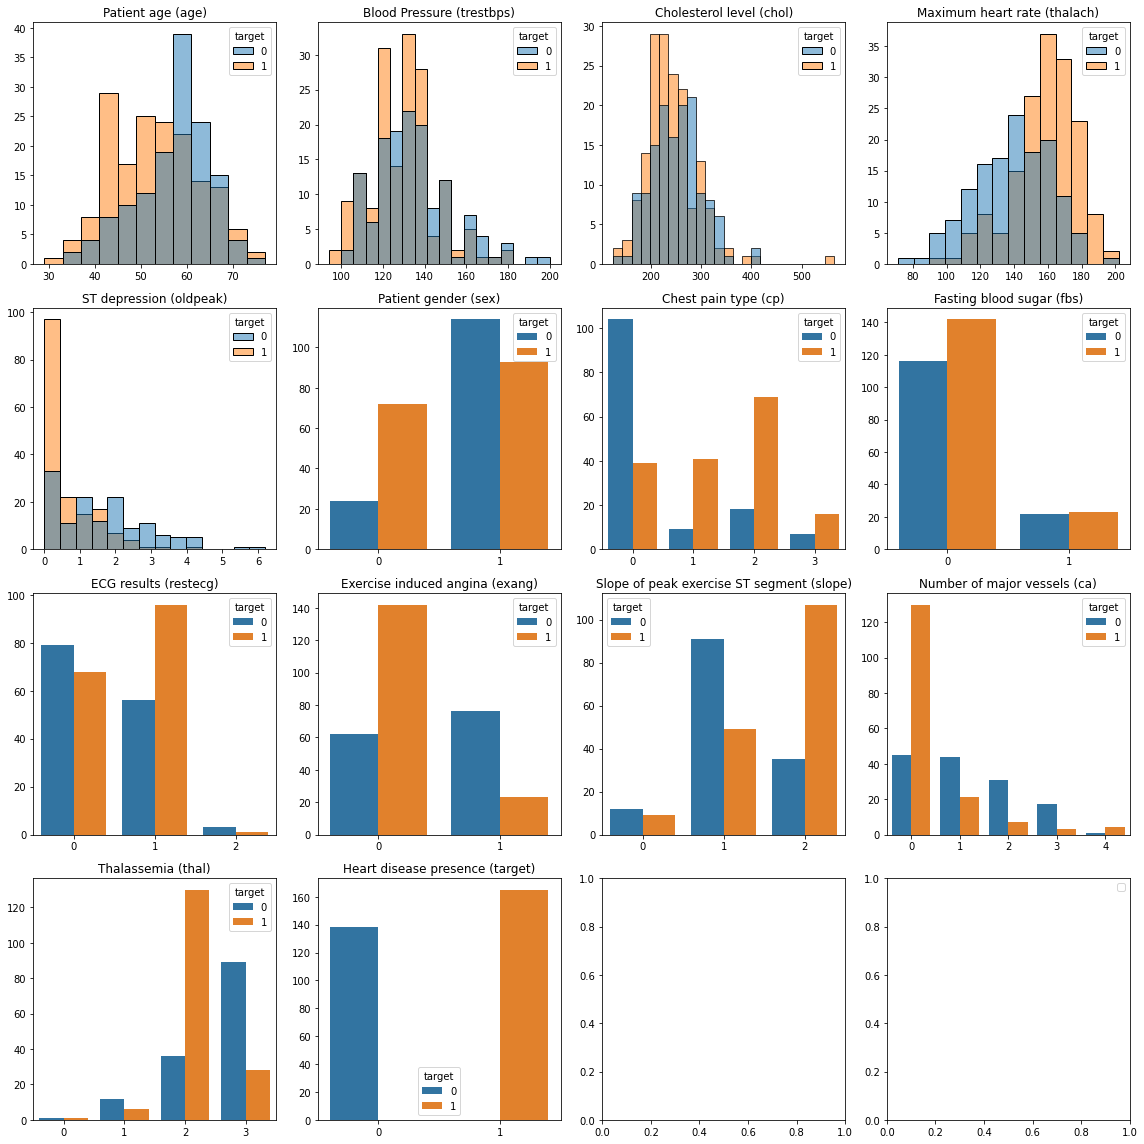

In [42]:
plt.figure(figsize=(10, 6))
# Define the columns to analyze
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Define the column descriptions
descriptions = {
    'age': 'Patient age (age)',
    'trestbps': 'Blood Pressure (trestbps)',
    'chol': 'Cholesterol level (chol)',
    'thalach': 'Maximum heart rate (thalach)',
    'oldpeak': 'ST depression (oldpeak)',
    'sex': 'Patient gender (sex)',
    'cp': 'Chest pain type (cp)',
    'fbs': 'Fasting blood sugar (fbs)',
    'restecg': 'ECG results (restecg)',
    'exang': 'Exercise induced angina (exang)',
    'slope': 'Slope of peak exercise ST segment (slope)',
    'ca': 'Number of major vessels (ca)',
    'thal': 'Thalassemia (thal)',
    'target': 'Heart disease presence (target)'
}

# Create a figure with subplots
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

# Loop through the columns and plot the charts
for i, cols in enumerate(descriptions.keys()):
 # Get the row and column index of the subplot
 row = i // 4
 col = i % 4
 
 # Check if the column should use histplot or barplot
 if cols in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
  # Plot the histplot with seaborn
  sns.histplot(data=heart, x=cols, hue="target", ax=axes[row][col])
 else:
  # Plot the barplot with seaborn
  sns.countplot(data=heart, x=cols, hue="target", ax=axes[row][col])
 
 # Set the title and labels
 axes[row][col].set_title(descriptions[cols])
 axes[row][col].set_xlabel("")
 axes[row][col].set_ylabel("")

# Adjust the layout and show the figure
plt.legend(loc=1)
plt.tight_layout()
plt.show()

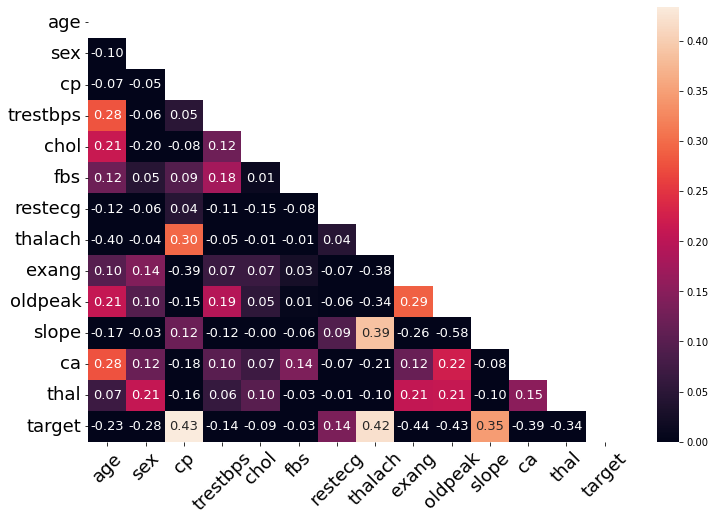

In [91]:
def corrmat():
    plt.figure(figsize=(12, 8))

    corr = heart.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    masked_corr = corr.mask(mask)
    sns.heatmap(masked_corr, annot=True, annot_kws={"size": 13}, fmt='.2f', vmin = 0) 

    plt.xticks(fontsize=18, rotation=45)
    plt.yticks(fontsize=18)

    plt.show()
    return corr
testingdf = corrmat()

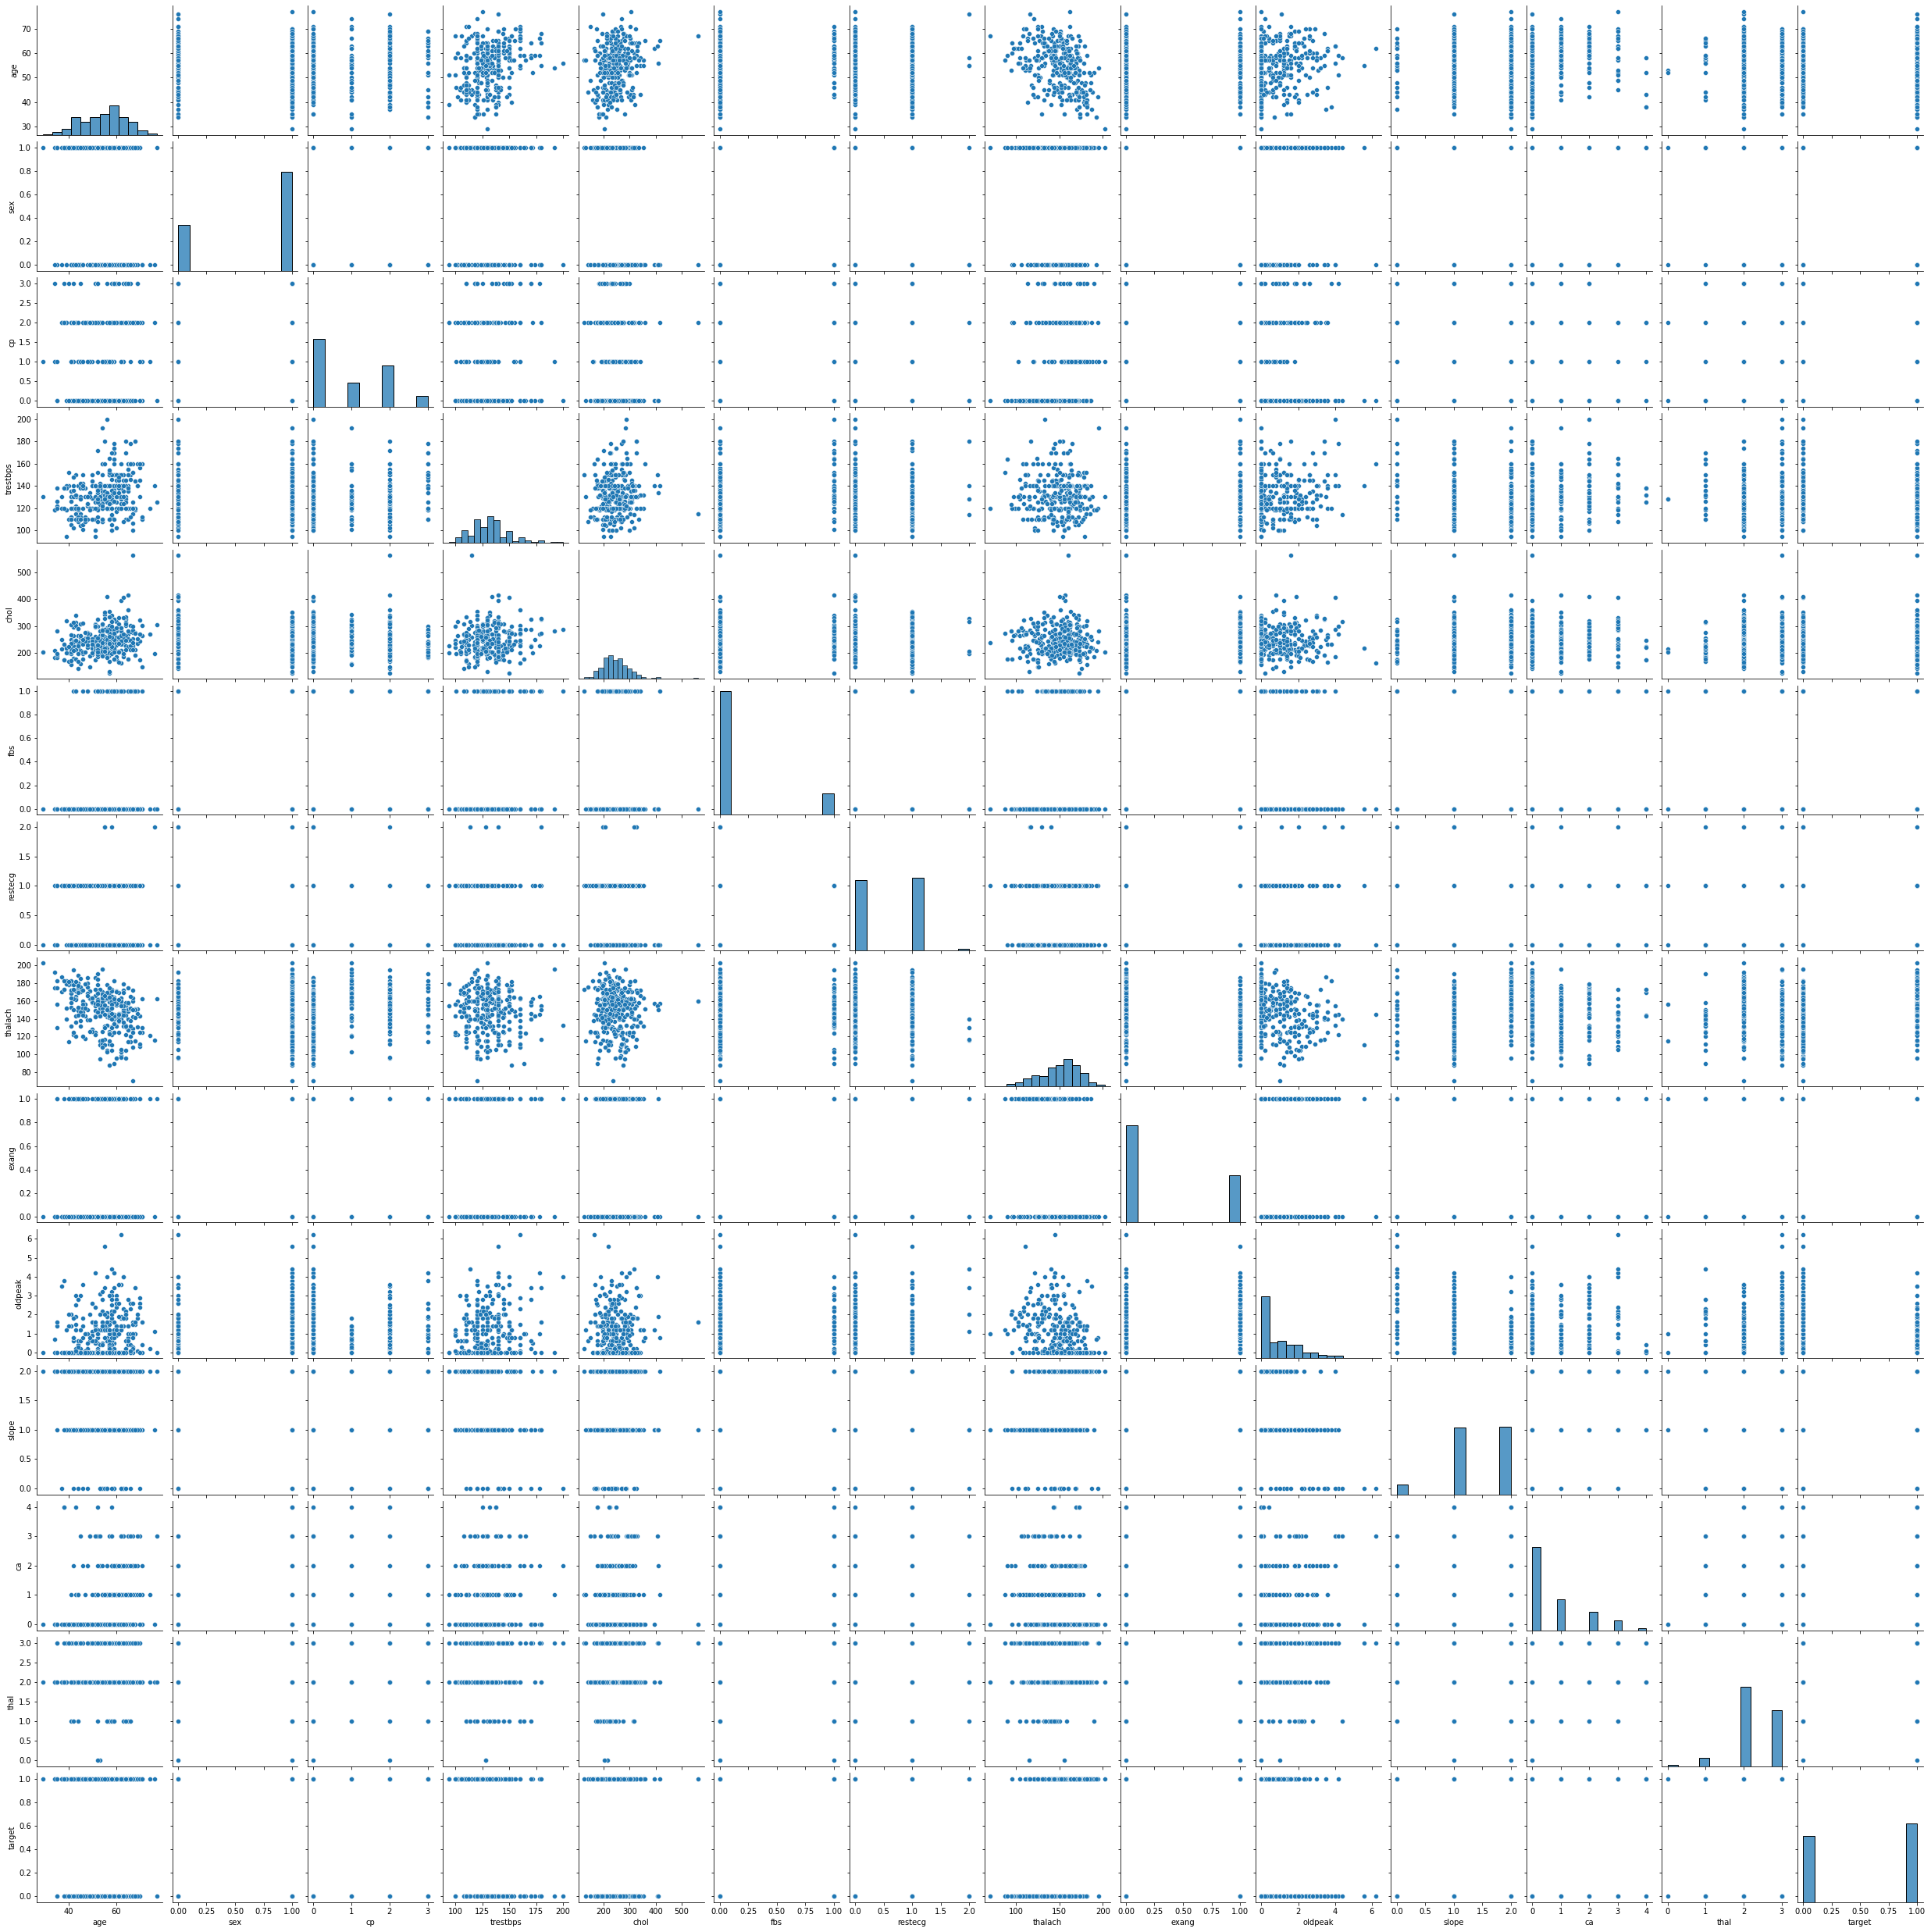

In [19]:
sns.pairplot(heart)

In [20]:
heart["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [21]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [22]:
# import libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# features
X = testing.drop(['target'], axis=1)
# target
y = testing['target']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the data using standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# import models
import timeit
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

models = [
    ("KNN", KNeighborsClassifier(), 
        {'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 
         'weights': ['uniform', 'distance'],
         'algorithm' : ['auto', 'ball_tree','kd_tree'],
         'p': [1, 2, 3, 4]}),
    
    ("Naive Bayes Bernoulli", BernoulliNB(), 
        {'alpha': [0.1, 1, 10], 
         'fit_prior': [True, False],
         'binarize': [0.0, 0.5, 1.0]}),
    
    ("SVM", SVC(), 
       {'C': [0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        # 'degree' : [2,3,4,5],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}),
    
    # ("Decision Tree", DecisionTreeClassifier(), 
    #     {'max_depth': [None, 5, 10], 
    #      'min_samples_split': [2, 5, 10],
    #      'criterion': ['gini', 'entropy']}),
    
    # ("Logistic Regression", LogisticRegression(), 
    #     {'max_iter' : [2000],
    #      'penalty' : ['l1', 'l2'],
    #      'C' : np.logspace(-4, 4, 20),
    #      'solver' : ['liblinear']})
]

# create 2 empty dataframes to store the output
row_names = ['best accuracy', 'best_params', 'precision', 'recall', 'f1_score', 'confusion matrix']
heart_beforeTuned = pd.DataFrame(index=['cv mean accuracy','training time'])
heart_Tuned = pd.DataFrame(index=row_names)

# loop through each model and fit, predict, and score with and without using GridSearchCV
for name, model, param_grid in models:
    print(f"Now training {name} model")
    # start timer to calculate the time taken to cross validate
    startTimer = timeit.default_timer()
    
    '''before tuning the hyperparameters'''
    cv = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    
    # calculate the time taken to cross validate
    endTimer = timeit.default_timer() - startTimer
    
    # calculate and store the accuracy of each model in the output dataframe
    heart_beforeTuned.loc['cv mean accuracy',name] = cv.mean()
    heart_beforeTuned.loc['training time', name] = endTimer
    
    '''tuning the hyperparameters'''
    # create a GridSearchCV instance for the current model
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=True)
    
    # fit the model on the scaled training data
    grid_search.fit(X_train, y_train)
    
    # predict on the test data using the best estimator found by GridSearchCV
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    # calculate and store the accuracy of each model in the output dataframe
    heart_Tuned.loc['best accuracy', name] = round(grid_search.best_estimator_.score(X_test, y_test),2)
    heart_Tuned.loc['best_params', name] = str(grid_search.best_params_)
    heart_Tuned.loc['precision', name] = round(precision_score(y_test, y_pred),4)
    heart_Tuned.loc['recall', name] = round(recall_score(y_test, y_pred),4)
    heart_Tuned.loc['f1_score', name] = round(f1_score(y_test, y_pred),4)
    heart_Tuned.loc['confusion matrix', name] = str(confusion_matrix(y_test,y_pred)).replace('\n', '')
    

Now training KNN model
Fitting 5 folds for each of 168 candidates, totalling 840 fits
Now training Naive Bayes Bernoulli model
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Now training SVM model
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [46]:
heart_combined = pd.concat([heart_beforeTuned.T, heart_Tuned.T], axis=1)
heart_summary = heart_combined.sort_values(by="best accuracy", ascending=False)
heart_summary = heart_summary[['best accuracy', 'cv mean accuracy', 'training time', 'precision', 'recall', 'f1_score', 'confusion matrix', 'training time', 'best_params']]
heart_summary

,best accuracy,cv mean accuracy,training time,precision,recall,f1_score,confusion matrix,training time,best_params
KNN,0.85,0.777041,1.221793,0.8485,0.875,0.8615,[[24 5] [ 4 28]],1.221793,"{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1..."
Naive Bayes Bernoulli,0.82,0.814116,0.008822,0.8621,0.7812,0.8197,[[25 4] [ 7 25]],0.008822,"{'alpha': 0.1, 'binarize': 0.0, 'fit_prior': F..."
SVM,0.82,0.764711,0.007710,0.8621,0.7812,0.8197,[[25 4] [ 7 25]],0.007710,"{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}"


| Model | all features | corr>0 (5 features) | corr<0 (10 features) | RFE (10 features) | SelectKBest with f_regression |
| :-: | :-: | :-: | :-: | :-: | :-: |
| Columns | all |'cp','restecg' ,'slope','target','thalach'|'age','ca','chol','exang' ,'fbs','oldpeak','sex','thal','trestbps'|'ca','cp','exang','oldpeak','restecg','sex','slope','thal' ,'thalach','trestbps'|'ca' ,'cp','exang','oldpeak','thalach'|
| Naives Bayes | 0.87 | 0.82 | 0.82 | 0.82 | 0.82 |
| SVM | 0.85 | 0.8 | 0.82 | 0.82 | 0.82 |
| KNN | 0.84 | 0.77 | 0.85 | 0.85 | 0.85 |

---
Feature selection

* RFE - Logistici Regression

In [64]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create an instance of the classifier
classifier = LogisticRegression()

X = heart.drop(['target'], axis=1)
y = heart['target']

# Create an instance of RFE and specify the number of desired features
rfe = RFE(estimator=classifier, n_features_to_select=10)  # Adjust the number of features as per your requirements

# Fit RFE on your feature matrix X and target variable y
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal'],
      dtype='object')


* SelectKBest with f_regression

In [65]:
# Import libraries
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# Separate features and target
X = heart.drop('target', axis=1)
y = heart['target']

# Create and fit selector
selector = SelectKBest(f_regression, k=5) # You can change k to any number of features you want
selector.fit(X, y)

# Get columns to keep and create new DataFrame with those only
cols = selector.get_support(indices=True)
selected_features = X.iloc[:,cols]
selected_features = selected_features.columns.tolist()
# Print the selected features
print(selected_features)

['cp', 'thalach', 'exang', 'oldpeak', 'ca']


* correlation matrix

In [63]:
abc = pd.DataFrame(testingdf['target'].sort_values(ascending=False)<0)
abc = abc[abc["target"] == True].index.tolist()
abc

['fbs', 'chol', 'trestbps', 'age', 'sex', 'thal', 'ca', 'oldpeak', 'exang']

In [ ]:
# testing = heart[['restecg','slope','thalach','cp','target']]
# testing = heart[['restecg','slope','thalach','cp','target']]
# testing = heart[['age', 'sex', 'trestbps', 'chol', 'fbs', 'exang', 'oldpeak', 'ca', 'thal', 'target']]
testing = heart[selected_features]
testing.columns